In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!du -sh '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions'

40G	/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions


In [ ]:
tiles = glob.glob('/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/*/*.tif')

In [ ]:
len(tiles)

14364

In [ ]:
!du -sh '/content/drive/MyDrive/Supraglacial Lakes Detection/data/test'

11G	/content/drive/MyDrive/Supraglacial Lakes Detection/data/test


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 18.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import os, glob
import json
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
path1 = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/lakes_regions.gpkg"
lakes_regions_df = gpd.read_file(path1)

In [ ]:
path2 = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/lake_polygons_training.gpkg"
training_meta_df = gpd.read_file(path2)

## clip regions

In [ ]:
lakes_regions_df

,region_num,geometry
0,1,"POLYGON ((-5449321.891 10875536.208, -5484512...."
1,2,"POLYGON ((-5581347.050 10549567.616, -5667660...."
2,3,"POLYGON ((-5677516.471 10248298.652, -5678009...."
3,4,"POLYGON ((-5678009.204 9927217.104, -5677904.5..."
4,5,"POLYGON ((-2366209.810 15614995.673, -2476111...."
5,6,"POLYGON ((-3526251.976 14894948.043, -3462201...."


<Axes: >

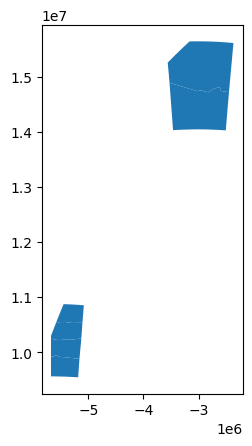

In [ ]:
lakes_regions_df.plot()

In [ ]:
training_meta_df

,image,region_num,geometry
0,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5557392.360 10529124.209, -5557430...."
1,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5515504.868 10233656.876, -5515543...."
2,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5515199.120 10446801.530, -5515160...."
3,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5502090.170 10342694.297, -5502090...."
4,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5500714.304 10485784.414, -5500714...."
...,...,...,...
2914,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2522995.211 14778908.326, -2522956...."
2915,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2930022.387 14770423.816, -2929754...."
2916,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2830845.343 14772908.020, -2830768...."
2917,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2885421.381 14759569.758, -2884962...."


In [ ]:
training_region = {"Greenland26X_22W_Sentinel2_2019-06-19_20.tif": [0, 2, 4],
                   "Greenland26X_22W_Sentinel2_2019-06-03_05.tif": [1, 3, 5],
                   "Greenland26X_22W_Sentinel2_2019-08-25_29.tif": [0, 2, 4],
                   "Greenland26X_22W_Sentinel2_2019-07-31_25.tif": [1, 3, 5]}

In [ ]:
test_region = {
                   "Greenland26X_22W_Sentinel2_2019-06-03_05.tif": [0, 2, 4],
                   "Greenland26X_22W_Sentinel2_2019-08-25_29.tif": [1, 3, 5],
                   "Greenland26X_22W_Sentinel2_2019-07-31_25.tif": [0, 2, 4]}

In [ ]:
for path in [glob.glob('/content/drive/MyDrive/Supraglacial Lakes Detection/data/*.tif')[3]]:
  raster = rasterio.open(path)
  out_meta = raster.meta.copy()
  img = path.split("/")[-1]
  reg_num = training_region[img]

  for reg in reg_num:
    reg_poly = lakes_regions_df.geometry[reg]
    clip_poly = gpd.GeoSeries([reg_poly])
    out_img, out_transform = mask(dataset=raster, shapes=clip_poly, crop=True)
    out_meta.update({"driver": "GTiff",
                    "height": out_img.shape[1],
                    "width": out_img.shape[2],
                    "transform": out_transform,
                    "crs": raster.crs}
                            )
    out_tif = f"/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/{img[:-4]}_region{reg + 1}.tif"
    with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

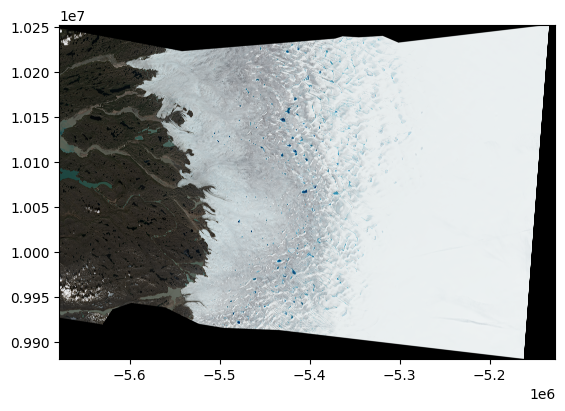

In [ ]:
for reg in [3, 5]:
  path = f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/Greenland26X_22W_Sentinel2_2019-06-19_20_region{reg}.tif'
  clipped = rasterio.open(path)
  show(clipped)

In [ ]:
for reg in [2, 4]:
  path = f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/Greenland26X_22W_Sentinel2_2019-06-03_05_region{reg}.tif'
  clipped = rasterio.open(path)
  show(clipped)

In [ ]:
for reg in [6]:
  path = f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/Greenland26X_22W_Sentinel2_2019-06-03_05_region{reg}.tif'
  clipped = rasterio.open(path)
  show(clipped)

## generate label

In [ ]:
shapes = {}
# region_label = {}
for path in glob.glob('/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/*.tif'):
  reg_raster = rasterio.open(path)
  shape = reg_raster.shape

  img = path.split("/")[-1]
  reg_num= int(img[-5])
  img_name = img[:-12] + ".tif"

  shapes[img] = shape

  labels = np.zeros(shape)

  reg_df = training_meta_df[(training_meta_df["image"] == img_name) & (training_meta_df["region_num"] == reg_num)]
  geocoor = reg_df["geometry"].apply(lambda x : x.exterior.coords.xy)

  geox = geocoor.apply(lambda x : x[0]).sum()
  geoy = geocoor.apply(lambda x : x[1]).sum()
  pixely, pixelx = reg_raster.index(geox, geoy)

  labels[pixely, pixelx] = 1

  region_label[img] = labels
  np.save(f"/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/{img}_label.npy", labels)

In [ ]:
shapes

{'Greenland26X_22W_Sentinel2_2019-06-03_05_region2.tif': (8710, 14957),
 'Greenland26X_22W_Sentinel2_2019-06-03_05_region4.tif': (10358, 13524),
 'Greenland26X_22W_Sentinel2_2019-06-03_05_region6.tif': (22641, 28235),
 'Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif': (8733, 13078),
 'Greenland26X_22W_Sentinel2_2019-06-19_20_region3.tif': (9723, 14414),
 'Greenland26X_22W_Sentinel2_2019-06-19_20_region5.tif': (24194, 31216),
 'Greenland26X_22W_Sentinel2_2019-07-31_25_region2.tif': (8710, 14957),
 'Greenland26X_22W_Sentinel2_2019-07-31_25_region4.tif': (10358, 13524),
 'Greenland26X_22W_Sentinel2_2019-07-31_25_region6.tif': (22641, 28235),
 'Greenland26X_22W_Sentinel2_2019-08-25_29_region1.tif': (8733, 13078),
 'Greenland26X_22W_Sentinel2_2019-08-25_29_region3.tif': (9723, 14414),
 'Greenland26X_22W_Sentinel2_2019-08-25_29_region5.tif': (24194, 31216)}

## clip region


In [ ]:
glob.glob('/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/*.tif')

['/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-03_05_region2.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-03_05_region4.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-03_05_region6.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region3.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region5.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-07-31_25_region2.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019

In [ ]:
paths = [
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region3.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region5.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-07-31_25_region2.tif',
 '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-07-31_25_region4.tif',]

In [ ]:
from itertools import product
from rasterio.windows import Window

tile_size = 512
# path = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif"
for path in paths:
  with rasterio.open(path) as reg_raster:
      img = path.split("/")[-1][:-4]
      meta = reg_raster.meta
      img_width, img_height = meta['width'], meta['height']
      offsets = product(range(0, img_width - tile_size, tile_size), range(0, img_height - tile_size, tile_size))
      labels = np.load(f"{path}_label.npy")
      os.mkdir(f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/{img}')
      tile_num = 0
      for col_off, row_off in offsets:
          window = Window(col_off=col_off, row_off=row_off, width=tile_size, height=tile_size)
          data = reg_raster.read(window=window)
          label = labels[row_off : row_off + 512, col_off : col_off + 512].copy()
          # add padding

          kwargs = reg_raster.meta.copy()
          kwargs.update({
              'height': window.height,
              'width': window.width,
              'transform': rasterio.windows.transform(window, reg_raster.transform)})

          with rasterio.open(f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/{img}/tile{tile_num}.tif', 'w', **kwargs) as dst:
              dst.write(data)

          #model prediction
          np.save(f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/{img}/tile{tile_num}_label.npy', label)
          #tile position
          tile_num += 1

          #combine prediction labels {(row, col):label}

          #find polygons from one zero matrix []

          #rasterio points
          #shapely polygon






## draft

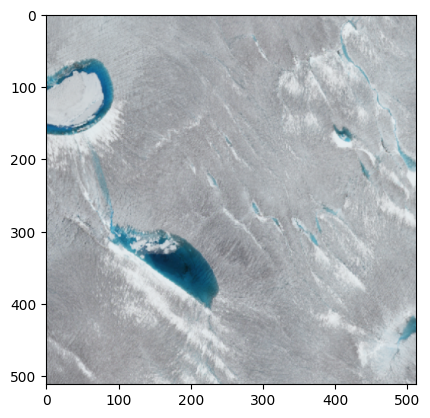

In [ ]:
from itertools import product
from rasterio.windows import Window

tile_size = 512
path = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif"
with rasterio.open(path) as reg_raster:
    meta = reg_raster.meta
    img_width, img_height = meta['width'], meta['height']
    window = Window(col_off=4000, row_off=5000, width=tile_size, height=tile_size)
    data = reg_raster.read(window=window)

    kwargs = reg_raster.meta.copy()
    kwargs.update({
        'height': window.height,
        'width': window.width,
        'transform': rasterio.windows.transform(window, reg_raster.transform)})

    with rasterio.open('/content/drive/MyDrive/Supraglacial Lakes Detection/data/test11.tif', 'w', **kwargs) as dst:
        dst.write(data)

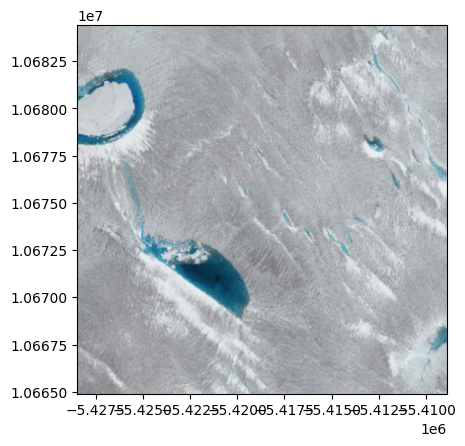

<Axes: >

In [ ]:
path = f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/test11.tif'
clipped = rasterio.open(path)
show(clipped)

In [ ]:
path = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif"


l = np.load(f"{path}_label.npy")

In [ ]:
l.shape

(8733, 13078)

In [ ]:
8733 / 512

17.056640625

In [ ]:
13078 / 512

25.54296875

In [ ]:
l1 = l[0:512, 0:512]

In [ ]:
np.array([10, 30])[2: 5, 50 : ]

array([10, 30])

In [ ]:
l1.shape

(512, 512)

In [ ]:
clipped.xy(0, 0)

(-5428462.202527835, 10684425.141473116)

In [ ]:
reg_raster.xy(5000, 4000)

(-5428462.202527835, 10684425.141473118)

In [ ]:
window.height

512

In [ ]:
y = [x for x in offsets]


In [ ]:
for x in range(0, 14, 3):
  print(x)

0
3
6
9
12


In [ ]:
len(y)

1734

In [ ]:
yy = [x for x in range(0, img_width, tile_size)]

In [ ]:
13078 / 256

51.0859375

In [ ]:
34 * 51

1734

In [ ]:
y1 = list(zip(*y))

In [ ]:
max(y1[0]), max(y1[1])

(13056, 8704)

In [ ]:
shape

(8733, 13078)

2

In [ ]:
clip_rows, clip_cols = round(shape[0]/256), round(shape[1]/224)

In [ ]:
reg_raster.shape

(8733, 13078)

In [ ]:
x = [x for x in shapes.values()]

In [ ]:
s0, s1 = list(zip(*x))

In [ ]:
x = np.array(s0)

In [ ]:
x % 256

array([  6, 118, 113,  29, 251, 130,   6, 118, 113,  29, 251, 130])

In [ ]:
x / 256

array([34.0234375 , 40.4609375 , 88.44140625, 34.11328125, 37.98046875,
       94.5078125 , 34.0234375 , 40.4609375 , 88.44140625, 34.11328125,
       37.98046875, 94.5078125 ])

In [ ]:
np.round(x / 224)

array([ 39.,  46., 101.,  39.,  43., 108.,  39.,  46., 101.,  39.,  43.,
       108.])

In [ ]:
y = np.array(s1)

In [ ]:
y%256

array([109, 212,  75,  22,  78, 240, 109, 212,  75,  22,  78, 240])

In [ ]:
8710%224

198

In [ ]:
10358//224

46

In [ ]:
import math
math.gcd(*t)

1

In [ ]:
path = f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/train/Greenland26X_22W_Sentinel2_2019-06-19_20_region1.tif'
# reg_raster = rasterio.open(path)


In [ ]:
reg_raster.shape

(8733, 13078)

In [ ]:
reg_lakes = training_meta_df[(training_meta_df["image"] == "Greenland26X_22W_Sentinel2_2019-06-19_20.tif") & (training_meta_df["region_num"] == 1)]

In [ ]:
reg_lakes

,image,region_num,geometry
778,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5412505.973 10738943.852, -5412505...."
779,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5398059.375 10669921.215, -5398059...."
780,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5459858.712 10755033.846, -5459935...."
781,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5405397.329 10759314.320, -5405397...."
782,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5452941.161 10731376.586, -5452979...."
...,...,...,...
972,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5426685.042 10557902.750, -5426685...."
973,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5390797.857 10570209.112, -5390759...."
974,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5402989.563 10556947.288, -5402989...."
975,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,1,"POLYGON ((-5395345.860 10553431.184, -5395078...."


In [ ]:
x = reg_lakes["geometry"].apply(lambda x : x.exterior.coords.xy)

In [ ]:
type(x.apply(lambda x : x[0]).sum())

array.array

In [ ]:
reg_df = gpd.GeoSeries([reg_lakes.geometry.iloc[0]])

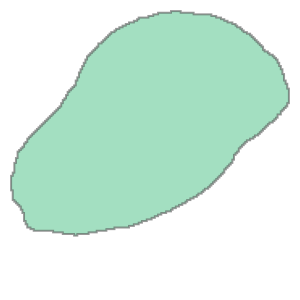

In [ ]:
reg_lakes.geometry.iloc[0]

In [ ]:
reg_df.bounds

,minx,miny,maxx,maxy
0,-5.412888e+06,1.073871e+07,-5.406315e+06,1.074403e+07


In [ ]:
geom =gpd.GeoSeries([box(*reg_df.bounds.loc[0])])

In [ ]:
out_img, out_transform = mask(dataset=reg_raster, shapes=geom, crop=True)

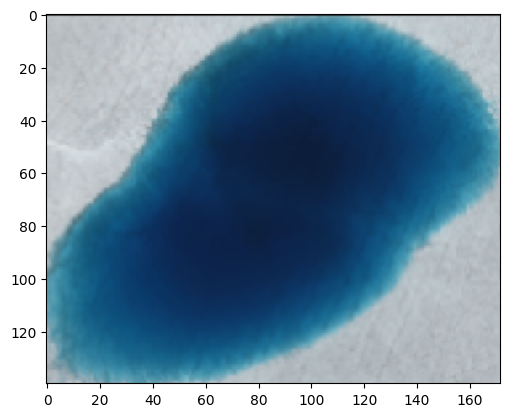

<Axes: >

In [ ]:
show(out_img)

In [ ]:
xx, yy = reg_lakes.geometry.iloc[0].exterior.coords.xy

In [ ]:
yy, xx = reg_raster.index(xx, yy)

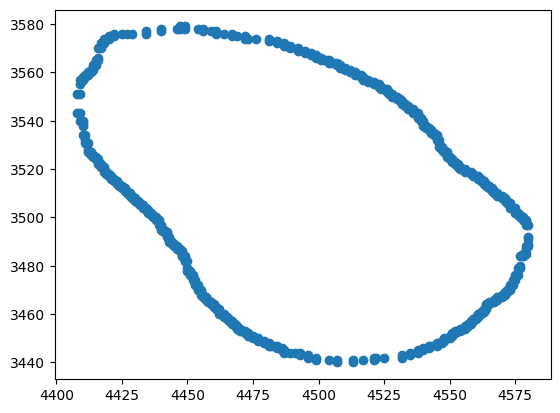

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xx, yy)

In [ ]:
rows, cols = rasterio.transform.rowcol(reg_raster.transform, xx, yy)

In [ ]:
np.array(rows)

list

In [ ]:
np.flip([1,5,3, 6])

array([6, 3, 5, 1])

In [ ]:
xx1, yy1 = reg_raster.xy(rows,cols)

In [ ]:
len(xx)

483

In [ ]:
len(rows)

483

In [ ]:
labels = np.zeros(reg_raster.shape)

In [ ]:
labels.shape

(8733, 13078)

In [ ]:
max(yy)

3579

In [ ]:
type(xx)

list

In [ ]:
labels[xx, yy] = 1

In [ ]:
labels[4408:4585, 3440:3579]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np
a = np.zeros((4,2))
vals = [4,3,2,1]
pos = [(0,0),(1,1),(2,0),(3,1)]
rows, cols = zip(*pos)
a[rows, cols] = vals

In [ ]:
crop_list = [(xx[i], yy[i]) for i in range(0, len(xx))]

In [ ]:
crop_list

In [ ]:
import cv2
import numpy as np

# load the image
image_path = ''
image = cv2.imread(path)

# # create a mask with white pixels
mask = np.ones(image.shape, dtype=np.uint8)
mask.fill(255)

# points to be cropped
roi_corners = np.array([crop_list], dtype=np.int32)
# fill the ROI into the mask
cv2.fillPoly(mask, roi_corners, 0)

# # The mask image
cv2.imwrite('/content/drive/MyDrive/Supraglacial Lakes Detection/data/image_masked.png', mask)

# # applying th mask to original image
masked_image = cv2.bitwise_or(image, mask)

# # The resultant image
cv2.imwrite('/content/drive/MyDrive/Supraglacial Lakes Detection/data/new_masked_image.png', masked_image)

True

In [ ]:
centerx, centery= -5308659.606, 10701638.763

In [ ]:
bbox = box(centerx-100000, centery-100000, centerx+100000, centery+100000)

In [ ]:
geom =gpd.GeoSeries([box(*r_bounds.loc[1])])

In [ ]:
xx, yy = bbox.exterior.coords.xy

In [ ]:
xx

array('d', [-5308559.606, -5308559.606, -5308759.606, -5308759.606, -5308559.606])

In [ ]:
yy

array('d', [10701538.763, 10701738.763, 10701738.763, 10701538.763, 10701538.763])

In [ ]:
import rasterio
img1 = rasterio.open("/content/drive/MyDrive/Supraglacial Lakes Detection/data/Greenland26X_22W_Sentinel2_2019-06-03_05.tif")

In [ ]:
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=img1.crs)
print(geo)

                                            geometry
0  POLYGON ((-5208659.606 10601638.763, -5208659....


In [ ]:
from rasterio.mask import mask
out_img, out_transform = mask(dataset=img1, shapes=geo['geometry'], crop=True)

In [ ]:
out_meta = img1.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 87040, 'height': 160000, 'count': 3, 'crs': CRS.from_epsg(3857), 'transform': Affine(38.21851414258808, 0.0, -5684468.919511961,
       0.0, -38.21851414258808, 15654303.392804058)}


In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": img1.crs}
                         )

In [ ]:
out_tif = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/test5.tif"
with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

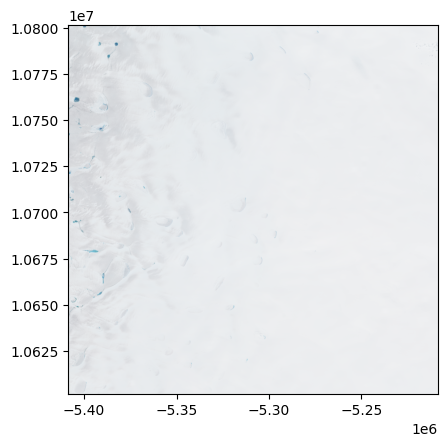

<Axes: >

In [ ]:
from rasterio.plot import show
# Open the clipped raster file
clipped = rasterio.open(out_tif)

# Visualize
show(clipped)

In [ ]:
poly = lakes_regions_df.geometry[1]

In [ ]:
geo = gpd.GeoDataFrame({'geometry': poly}, index=[0], crs=img1.crs)
print(geo)

                                            geometry
0  POLYGON ((-5581347.050 10549567.616, -5667660....


In [ ]:
out_img, out_transform = mask(dataset=img1, shapes=geo['geometry'], crop=True)

In [ ]:
out_meta = img1.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 87040, 'height': 160000, 'count': 3, 'crs': CRS.from_epsg(3857), 'transform': Affine(38.21851414258808, 0.0, -5684468.919511961,
       0.0, -38.21851414258808, 15654303.392804058)}


In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": img1.crs}
                         )

In [ ]:
out_tif = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/test3.tif"
with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

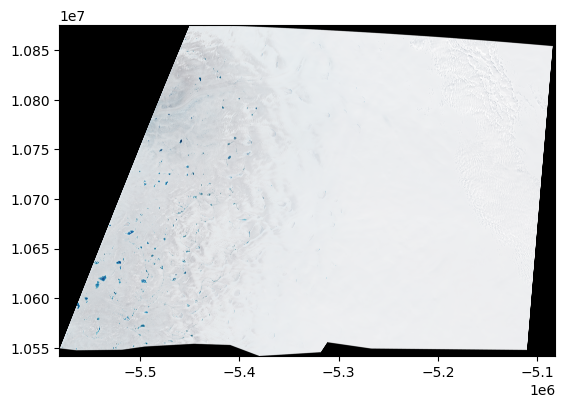

<Axes: >

In [ ]:
from rasterio.plot import show
data = rasterio.open(out_tif)

# Visualize the NIR band
show(data)

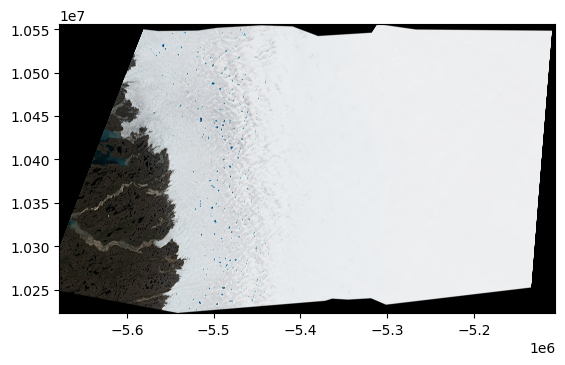

<Axes: >

In [ ]:
from rasterio.plot import show
# Open the clipped raster file
clipped = rasterio.open(out_tif)

# Visualize
show(clipped)

In [ ]:
from shapely.ops import unary_union

mergedPolys = gpd.GeoSeries([unary_union([lakes_regions_df.geometry[0], lakes_regions_df.geometry[1], lakes_regions_df.geometry[2], lakes_regions_df.geometry[3]])])

<Axes: >

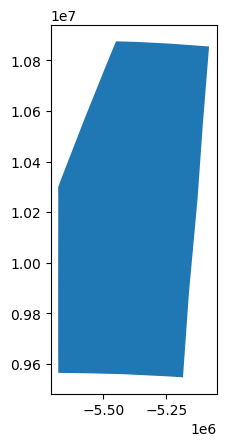

In [ ]:
mergedPolys.plot()

In [ ]:
clipped.read()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
clipped.shape

(8710, 14957)

In [ ]:
import cv2
path = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/Greenland26X_22W_Sentinel2_2019-06-03_05.tif"
im = cv2.imread(path, cv2.IMREAD_UNCHANGED)

error: ignored

In [ ]:
import geopandas as gpd

path1 = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/lake_polygons_training.gpkg"
training_meta_df = gpd.read_file(path1)

In [ ]:
tra = training_meta_df[(training_meta_df["region_num"] == 2) & (training_meta_df["image"] == "Greenland26X_22W_Sentinel2_2019-06-03_05.tif")]

<Axes: >

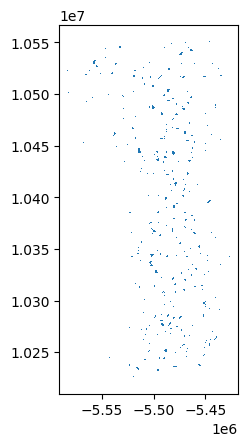

In [ ]:
tra.plot()

In [ ]:
plt.imread(tiff_file)

,image,region_num,geometry
0,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5557392.360 10529124.209, -5557430...."
1,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5515504.868 10233656.876, -5515543...."
2,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5515199.120 10446801.530, -5515160...."
3,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5502090.170 10342694.297, -5502090...."
4,Greenland26X_22W_Sentinel2_2019-06-03_05.tif,2,"POLYGON ((-5500714.304 10485784.414, -5500714...."
...,...,...,...
2914,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2522995.211 14778908.326, -2522956...."
2915,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2930022.387 14770423.816, -2929754...."
2916,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2830845.343 14772908.020, -2830768...."
2917,Greenland26X_22W_Sentinel2_2019-08-25_29.tif,5,"POLYGON ((-2885421.381 14759569.758, -2884962...."


In [ ]:
import geopandas as gpd

path2 = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/lakes_regions.gpkg"
lakes_regions_df = gpd.read_file(path2)

In [ ]:
df = lakes_regions_df.geometry.bounds

In [ ]:
df

,minx,miny,maxx,maxy
0,-5.581347e+06,1.054178e+07,-5.081544e+06,1.087554e+07
1,-5.677913e+06,1.022280e+07,-5.106320e+06,1.055567e+07
2,-5.678009e+06,9.881351e+06,-5.127154e+06,1.025291e+07
3,-5.678009e+06,9.547815e+06,-5.161181e+06,9.943628e+06
4,-3.559212e+06,1.472168e+07,-2.366210e+06,1.564630e+07
5,-3.526252e+06,1.402971e+07,-2.447190e+06,1.489495e+07


<Axes: >

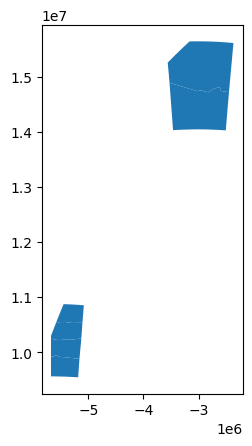

In [ ]:
import matplotlib.pyplot as plt

lakes_regions_df.plot()

In [ ]:
lakes_regions_df

,region_num,geometry
0,1,"POLYGON ((-5449321.891 10875536.208, -5484512...."
1,2,"POLYGON ((-5581347.050 10549567.616, -5667660...."
2,3,"POLYGON ((-5677516.471 10248298.652, -5678009...."
3,4,"POLYGON ((-5678009.204 9927217.104, -5677904.5..."
4,5,"POLYGON ((-2366209.810 15614995.673, -2476111...."
5,6,"POLYGON ((-3526251.976 14894948.043, -3462201...."


In [ ]:
!pip install rasterio

In [ ]:
import rasterio

#crs: Coordinate reference systems
with rasterio.open("/content/drive/MyDrive/Supraglacial Lakes Detection/data/Greenland26X_22W_Sentinel2_2019-06-03_05.tif") as src:
      left, bottom, right, top = src.bounds
      print(left, bottom, right, top)
      resolution = src.res[0]
      print(resolution)

-5684468.919511961 9539341.129989967 -2357929.4485410945 15654303.392804058
38.21851414258808


In [ ]:
from shapely.geometry import box

minx, miny = 1, 2
maxx, maxy = 3, 4
bbox = box(1, 2, 3, 4)

In [ ]:
t = gpd.GeoDataFrame({'geometry': bbox}, index=[0])
print(t)

                                            geometry
0  POLYGON ((3.00000 2.00000, 3.00000 4.00000, 1....


In [ ]:
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
print(geo)

In [ ]:
import rasterio
img1 = rasterio.open("/content/drive/MyDrive/Supraglacial Lakes Detection/data/Greenland26X_22W_Sentinel2_2019-06-03_05.tif")

In [ ]:
x = lakes_regions_df.geometry[0]

In [ ]:
lakes_regions_df

,region_num,geometry
0,1,"POLYGON ((-5449321.891 10875536.208, -5484512...."
1,2,"POLYGON ((-5581347.050 10549567.616, -5667660...."
2,3,"POLYGON ((-5677516.471 10248298.652, -5678009...."
3,4,"POLYGON ((-5678009.204 9927217.104, -5677904.5..."
4,5,"POLYGON ((-2366209.810 15614995.673, -2476111...."
5,6,"POLYGON ((-3526251.976 14894948.043, -3462201...."


In [ ]:
from fiona.crs import from_epsg
import pycrs
geo = gpd.GeoDataFrame({'geometry': x}, index=[0], crs=from_epsg(3857))
print(geo)

                                            geometry
0  POLYGON ((-5449321.891 10875536.208, -5484512....


In [ ]:
img1.crs

CRS.from_epsg(3857)

In [ ]:
geo.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
t = t.to_crs(crs=img1.crs.data)

# Print crs
t.crs

NameError: ignored

In [ ]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [ ]:
coords = getFeatures(t)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[3.0, 2.0], [3.0, 4.0], [1.0, 4.0], [1.0, 2.0], [3.0, 2.0]]]}]


In [ ]:
from rasterio.mask import mask
out_img, out_transform = mask(dataset=img1, shapes=coords, crop=True)

In [ ]:
epsg_code = int(img1.crs.data['init'][5:])
print(epsg_code)

3857


In [ ]:
out_meta = img1.meta.copy()

In [ ]:
from fiona.crs import from_epsg
import pycrs

In [ ]:
!pip install pycrs

In [ ]:
pycrs.parse.from_epsg_code(epsg_code).to_proj4()

'+proj=merc +a=6378137 +b=6378137 +pm=0 +lon_0=0 +x_0=0 +y_0=0 +k_0=1 +lat_ts=0 +units=m +axis=enu +no_defs'

In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": img1.crs}
                         )

In [ ]:
out_tif = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/test.tif"
with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

In [ ]:
x = lakes_regions_df.geometry[0]

In [ ]:
data.crs

CRS.from_epsg(3857)

In [ ]:
x = lakes_regions_df.geometry[0]

In [ ]:
geo = gpd.GeoDataFrame({'geometry': x}, index=[0], crs=from_epsg(3857))
print(geo)

                                            geometry
0  POLYGON ((-5449321.891 10875536.208, -5484512....


In [ ]:
img1.crs.data

{'init': 'epsg:3857'}

In [ ]:
geo = geo.to_crs(crs=img1.crs.data)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geo.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
coords1 = getFeatures(geo)
print(coords1)

[{'type': 'Polygon', 'coordinates': [[[-5449321.890779544, 10875536.207595274], [-5484512.436269976, 10790515.480235832], [-5494556.981734767, 10765819.752937915], [-5569475.436356638, 10579562.707293376], [-5581347.050005112, 10549567.616353689], [-5563750.545545724, 10547543.56859779], [-5517901.751606944, 10548067.554814234], [-5495108.351191664, 10551298.803148966], [-5445416.991665632, 10554093.396303331], [-5408825.287550683, 10552870.761798298], [-5379394.728393789, 10541779.720216917], [-5317564.35485349, 10545622.285804167], [-5310927.196111876, 10555665.354952661], [-5266737.691858498, 10549290.18931927], [-5106320.016359595, 10547870.580196649], [-5081544.322222586, 10855129.616665369], [-5236472.776926068, 10866351.798494997], [-5360540.23159807, 10872898.071228947], [-5449321.890779544, 10875536.207595274]]]}]


In [ ]:
pycrs.parse.from_epsg_code(epsg_code).to_proj4()

'+proj=merc +a=6378137 +b=6378137 +pm=0 +lon_0=0 +x_0=0 +y_0=0 +k_0=1 +lat_ts=0 +units=m +axis=enu +no_defs'

In [ ]:
out_img1, out_transform1 = mask(dataset=img1, shapes=coords1, crop=True)

In [ ]:
out_meta1 = img1.meta.copy()

In [ ]:
out_img.shape

(3, 8733, 13078)

In [ ]:
import numpy as np
np.unique(out_img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
out_transform

Affine(38.21851414258808, 0.0, -5581355.368355258,
       0.0, -38.21851414258808, 10875536.82144313)

In [ ]:
out_meta1.update({"driver": "GTiff",
                 "height": out_img1.shape[1],
                 "width": out_img1.shape[2],
                 "transform": out_transform1,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                         )

In [ ]:
out_tif1 = "/content/drive/MyDrive/Supraglacial Lakes Detection/data/regions/test1.tif"
with rasterio.open(out_tif1, "w", **) as dest:
        dest.write(out_img1)

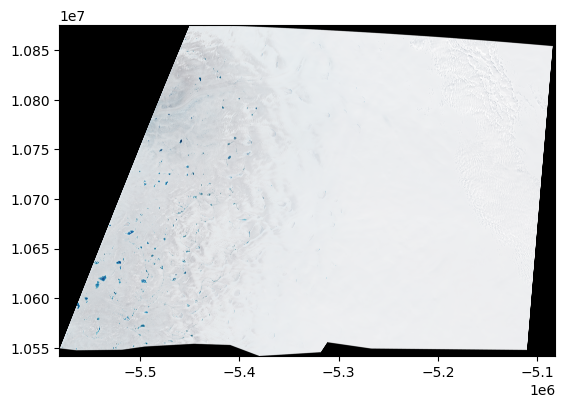

<Axes: >

In [ ]:
data = rasterio.open(out_tif, crs=img1.crs)

# Visualize the NIR band
show(data)

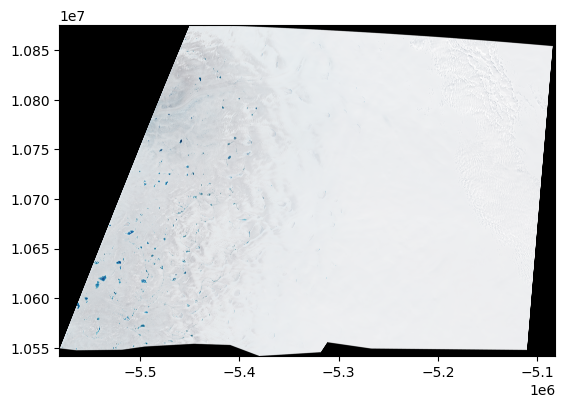

<Axes: >

In [ ]:
data1 = rasterio.open(out_tif1, crs=img1.crs)

# Visualize the NIR band
show(data1)

In [ ]:
img1.crs

CRS.from_epsg(3857)

In [ ]:
data.shape

(8733, 13078)

In [ ]:
out_img.shape

(3, 8733, 13078)

In [ ]:
data.xy(range(10),range(10))

([-5581336.259098187,
  -5581298.0405840445,
  -5581259.822069902,
  -5581221.603555759,
  -5581183.385041617,
  -5581145.166527474,
  -5581106.948013332,
  -5581068.729499189,
  -5581030.510985047,
  -5580992.292470904],
 [10875517.712186057,
  10875479.493671915,
  10875441.275157772,
  10875403.05664363,
  10875364.838129487,
  10875326.619615344,
  10875288.401101202,
  10875250.18258706,
  10875211.964072917,
  10875173.745558774])

In [ ]:
data.index([-5581336.259098187,
  -5581298.0405840445,
  -5581259.822069902,
  -5581221.603555759,
  -5581183.385041617,
  -5581145.166527474,
  -5581106.948013332,
  -5581068.729499189,
  -5581030.510985047,
  -5580992.292470904], [10875517.712186057,
  10875479.493671915,
  10875441.275157772,
  10875403.05664363,
  10875364.838129487,
  10875326.619615344,
  10875288.401101202,
  10875250.18258706,
  10875211.964072917,
  10875173.745558774])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
geo2= gpd.GeoDataFrame({'geometry':tra.geometry[0]}, index=[0], crs=from_epsg(3857))

coords2 = getFeatures(geo2)

In [ ]:
x = coords2[0]['coordinates'][0]

In [ ]:
y = list(zip(*x))[0]
z = list(zip(*x))[1]

In [ ]:
data.index(y,z)

([9063,
  9063,
  9062,
  9062,
  9061,
  9061,
  9061,
  9060,
  9060,
  9061,
  9061,
  9060,
  9060,
  9060,
  9060,
  9060,
  9060,
  9060,
  9060,
  9060,
  9060,
  9060,
  9059,
  9059,
  9058,
  9058,
  9057,
  9057,
  9056,
  9056,
  9056,
  9055,
  9055,
  9054,
  9054,
  9054,
  9054,
  9054,
  9052,
  9052,
  9052,
  9052,
  9050,
  9049,
  9049,
  9049,
  9048,
  9048,
  9047,
  9047,
  9046,
  9046,
  9045,
  9044,
  9044,
  9043,
  9043,
  9042,
  9041,
  9041,
  9040,
  9040,
  9039,
  9039,
  9038,
  9037,
  9037,
  9036,
  9036,
  9035,
  9033,
  9033,
  9032,
  9032,
  9031,
  9031,
  9029,
  9028,
  9028,
  9027,
  9027,
  9026,
  9022,
  9022,
  9020,
  9016,
  9016,
  9015,
  9014,
  9014,
  9012,
  9012,
  9011,
  9010,
  9010,
  9009,
  9008,
  9007,
  9004,
  9002,
  9000,
  9000,
  8999,
  8997,
  8996,
  8996,
  8995,
  8994,
  8994,
  8993,
  8992,
  8992,
  8991,
  8991,
  8991,
  8991,
  8991,
  8991,
  8989,
  8989,
  8989,
  8988,
  8988,
  8988,
  8987,


In [ ]:
from itertools import product
from rasterio.windows import Window

tile_size = 512
path = '/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/regions/Greenland26X_22W_Sentinel2_2019-06-03_05_region6.tif'
with rasterio.open(path) as reg_raster:
    img = path.split("/")[-1][:-4]
    meta = reg_raster.meta
    img_width, img_height = meta['width'], meta['height']
    offsets = product(range(0, img_width - tile_size, tile_size), range(0, img_height - tile_size, tile_size))
    labels = np.load(f"{path}_label.npy")
    # os.mkdir(f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/{img}')
    tile_num = 0
    for col_off, row_off in offsets:
        print('col_off', col_off, 'row_off', row_off)
        # window = Window(col_off=col_off, row_off=row_off, width=tile_size, height=tile_size)
        # data = reg_raster.read(window=window)
        label = labels[row_off : row_off + 512, col_off : col_off + 512].copy()

        # kwargs = reg_raster.meta.copy()
        # kwargs.update({
        #     'height': window.height,
        #     'width': window.width,
        #     'transform': rasterio.windows.transform(window, reg_raster.transform)})

        # with rasterio.open(f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/{img}/tile{tile_num}.tif', 'w', **kwargs) as dst:
        #     dst.write(data)
        np.save(f'/content/drive/MyDrive/Supraglacial Lakes Detection/data/train/tiles/{img}/tile{tile_num}_label.npy', label)
        tile_num += 1

col_off 0 row_off 0
col_off 0 row_off 512
col_off 0 row_off 1024
col_off 0 row_off 1536
col_off 0 row_off 2048
col_off 0 row_off 2560
col_off 0 row_off 3072
col_off 0 row_off 3584
col_off 0 row_off 4096
col_off 0 row_off 4608
col_off 0 row_off 5120
col_off 0 row_off 5632
col_off 0 row_off 6144
col_off 0 row_off 6656
col_off 0 row_off 7168
col_off 0 row_off 7680
col_off 0 row_off 8192
col_off 0 row_off 8704
col_off 0 row_off 9216
col_off 0 row_off 9728
col_off 0 row_off 10240
col_off 0 row_off 10752
col_off 0 row_off 11264
col_off 0 row_off 11776
col_off 0 row_off 12288
col_off 0 row_off 12800
col_off 0 row_off 13312
col_off 0 row_off 13824
col_off 0 row_off 14336
col_off 0 row_off 14848
col_off 0 row_off 15360
col_off 0 row_off 15872
col_off 0 row_off 16384
col_off 0 row_off 16896
col_off 0 row_off 17408
col_off 0 row_off 17920
col_off 0 row_off 18432
col_off 0 row_off 18944
col_off 0 row_off 19456
col_off 0 row_off 19968
col_off 0 row_off 20480
col_off 0 row_off 20992
col_off 0 row_of